# Auto-Encoder: detect credit card fraud through anomalies


In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
trans = pd.read_csv('/home/sequi/tmp/creditcard.csv', sep=',')

FileNotFoundError: [Errno 2] No such file or directory: '/home/sequi/tmp/creditcard.csv'

In [3]:
display(trans[:3])
print(trans.shape)
trans['Class'].sum()

NameError: name 'trans' is not defined

In [7]:
1-492/284807

0.9982725143693799

In [8]:
print(len(trans.loc[trans['Class']==1]))
trans.loc[trans['Class']==1][:5]

492


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [9]:
def hour(row):
    seconds = row['Time']
    return (seconds-int(seconds/86400)*86400)/3600
    
def weekday(row):
    seconds = row['Time']
    return int(seconds/86400)%7

In [10]:
# Create new columns with the hour and the weekday (relatives to T=0), 
# Since we expect a pattern in those periods
trans['weekday']  = trans.apply (lambda row: weekday(row), axis=1)
trans['hour']  = trans.apply (lambda row: hour(row), axis=1)

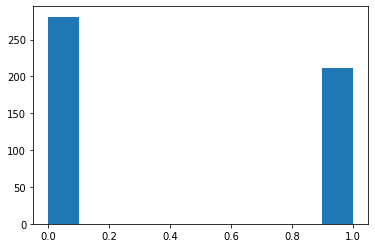

In [11]:
plt.hist(trans.loc[trans['Class']==1]['weekday'].tolist())
plt.show()

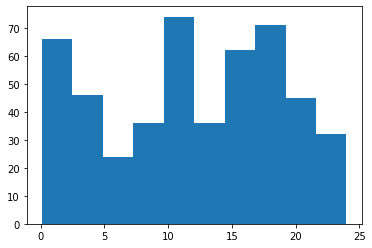

In [12]:
plt.hist(trans.loc[trans['Class']==1]['hour'].tolist())
plt.show()

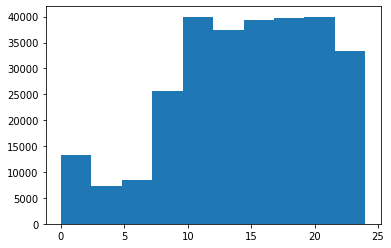

In [13]:
plt.hist(trans.loc[trans['Class']==0]['hour'].tolist())
plt.show()

In [14]:
from sklearn.utils import shuffle
trans = shuffle(trans)
trans.reset_index(drop=True, inplace=True)
trans[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,weekday,hour
0,132806.0,-0.598987,0.425233,0.170619,-2.483010,1.049204,-1.182570,1.239035,-0.356663,-2.000009,...,-0.633251,0.721123,1.330019,0.093007,-0.081568,0.021623,15.00,0,1,12.890556
1,129742.0,-0.312785,1.370619,-1.553164,-1.431627,1.581675,-0.563211,1.254472,0.162206,-0.921912,...,-0.298456,-0.071107,-0.149418,0.088318,0.267412,0.196704,0.76,0,1,12.039444
2,41774.0,0.972660,-0.991283,1.464566,0.679085,-1.765346,0.102129,-1.037138,0.288171,1.922664,...,-0.087137,0.471340,0.145034,1.096222,-0.029863,0.031996,107.18,0,0,11.603889
3,41435.0,-0.812499,1.065071,1.364722,-0.318808,0.510890,-0.164293,0.896121,-1.281639,-0.350974,...,-0.113654,0.238047,-0.126026,0.343813,-0.693967,-0.399945,9.99,0,0,11.509722
4,160140.0,-0.925823,1.589975,-0.824941,-0.945991,0.488496,-0.627737,0.636337,0.294529,0.379376,...,0.024628,-1.012710,-0.158683,0.217609,0.437324,0.219270,8.94,0,1,20.483333


In [15]:
# We now use the relevant features (but no Class!) to feed the autoencoder
# (We drop weekday because there are only 2 days on fata in the dataset)
AEfeed = trans.drop(['Time','Class','weekday'],axis=1)
AEfeed[:5]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hour
0,-0.598987,0.425233,0.170619,-2.483010,1.049204,-1.182570,1.239035,-0.356663,-2.000009,-0.234805,...,0.349605,0.767497,-0.633251,0.721123,1.330019,0.093007,-0.081568,0.021623,15.00,12.890556
1,-0.312785,1.370619,-1.553164,-1.431627,1.581675,-0.563211,1.254472,0.162206,-0.921912,-0.561846,...,0.284662,0.886963,-0.298456,-0.071107,-0.149418,0.088318,0.267412,0.196704,0.76,12.039444
2,0.972660,-0.991283,1.464566,0.679085,-1.765346,0.102129,-1.037138,0.288171,1.922664,-0.512863,...,-0.058170,-0.039384,-0.087137,0.471340,0.145034,1.096222,-0.029863,0.031996,107.18,11.603889
3,-0.812499,1.065071,1.364722,-0.318808,0.510890,-0.164293,0.896121,-1.281639,-0.350974,0.475619,...,0.813369,0.076238,-0.113654,0.238047,-0.126026,0.343813,-0.693967,-0.399945,9.99,11.509722
4,-0.925823,1.589975,-0.824941,-0.945991,0.488496,-0.627737,0.636337,0.294529,0.379376,0.280012,...,-0.375389,-0.813221,0.024628,-1.012710,-0.158683,0.217609,0.437324,0.219270,8.94,20.483333


### Prepare the Data and Build an Autoencoder

In [16]:
f=len(AEfeed)
f0 = int(0.75*f)
f0

213605

In [17]:
AEfeed.shape

(284807, 30)

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaled_seqs = scaler.fit_transform(AEfeed)
# Divide in train and test:
# Important: we do not use the fake events to train and test!
X_train = scaled_seqs[:f0]  
X_test = scaled_seqs[f0:]
print(X_train.shape[1])

30


In [19]:
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

# Parameters for the auto-encoder
input_dim = X_train.shape[1] # number of features (8 in this case)

# Typical training features
nb_epoch = 30
batch_size = 128
learning_rate = 0.1

# We create the auto-encoder layer by layer:

# Create first layer that receives each scaled_seq
input_layer = Input(shape=(input_dim, ))

# Pass it to a first layer and encode
encoder = Dense(24, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(22, activation="relu")(encoder)
encoder = Dense(18, activation="relu")(encoder)
encoder = Dense(14, activation='relu')(encoder)
# start decoder
decoder = Dense(18, activation='relu')(encoder)
decoder = Dense(22, activation='relu')(decoder)
decoder = Dense(24, activation='relu')(decoder)
decoder = Dense(input_dim, activation='tanh')(decoder)

# Physically create the auto-encoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)



Using TensorFlow backend.
/home/sequi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sequi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sequi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sequi/.local/lib/python3.7/site-packages/tensorflow/python/fra

In [20]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                744       
_________________________________________________________________
dense_2 (Dense)              (None, 22)                550       
_________________________________________________________________
dense_3 (Dense)              (None, 18)                414       
_________________________________________________________________
dense_4 (Dense)              (None, 14)                266       
_________________________________________________________________
dense_5 (Dense)              (None, 18)                270       
_________________________________________________________________
dense_6 (Dense)              (None, 22)                418       
__________

### Fit the Model

In [21]:
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model_seqs2.h5",
                               verbose=0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,   # <---- THIS IS THE *KEY* LINE THAT DEFINES THAT IS AN AUTOENCODER!
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

W1109 16:36:37.751068 140381452740096 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1109 16:36:38.736935 140381452740096 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1109 16:36:38.982626 140381452740096 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 213605 samples, validate on 71202 samples


W1109 16:36:39.508476 140381452740096 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1109 16:36:39.509349 140381452740096 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/30
213605/213605 [==============================] - 6s 27us/step - loss: 0.0200 - acc: 0.8585 - val_loss: 0.0053 - val_acc: 0.9512
Epoch 2/30
213605/213605 [==============================] - 5s 25us/step - loss: 0.0045 - acc: 0.9508 - val_loss: 0.0039 - val_acc: 0.9512
Epoch 3/30
213605/213605 [==============================] - 5s 22us/step - loss: 0.0035 - acc: 0.9508 - val_loss: 0.0031 - val_acc: 0.9512
Epoch 4/30
213605/213605 [==============================] - 4s 20us/step - loss: 0.0029 - acc: 0.9508 - val_loss: 0.0027 - val_acc: 0.9512
Epoch 5/30
213605/213605 [==============================] - 4s 19us/step - loss: 0.0026 - acc: 0.9509 - val_loss: 0.0024 - val_acc: 0.9511
Epoch 6/30
213605/213605 [==============================] - 3s 16us/step - loss: 0.0024 - acc: 0.9505 - val_loss: 0.0023 - val_acc: 0.9511
Epoch 7/30
213605/213605 [==============================] - 5s 21us/step - loss: 0.0022 - acc: 0.9509 - val_loss: 0.0021 - val_acc: 0.9512
Epoch 8/30
213605/213605 [=

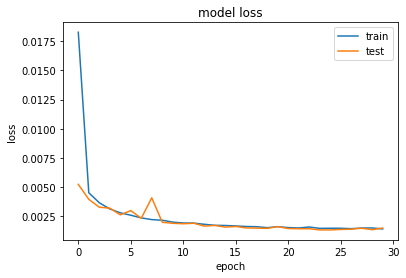

In [182]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [183]:
#autoencoder = load_model('model_seqs2.h5')
print(f'Min Loss:{np.min(history["loss"])}')

Min Loss:0.0014271373559816365


### Calculate the Error Term

In [184]:
#get the MSE error term
predictions = autoencoder.predict(scaled_seqs)
mse = np.mean(np.power(scaled_seqs - predictions, 2), axis=1)

In [185]:
mse_threshold = np.quantile(mse, 0.998)
print('MSE threshold =', mse_threshold) # => the 9999% quatile - only 0.0001% have error score higher than that

MSE threshold = 0.008102340662057114


In [186]:
scaled_seqs_scored = pd.DataFrame(scaled_seqs)

In [187]:
scaled_seqs_scored['MSE'] = mse

In [188]:
scaled_seqs_scored['MSE_Outlier'] = 0
scaled_seqs_scored.loc[scaled_seqs_scored['MSE'] > mse_threshold, 'MSE_Outlier'] = 1

In [189]:
scaled_seqs_scored[:5]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,MSE,MSE_Outlier
0,0.976359,0.766962,0.849162,0.304109,0.763272,0.265432,0.263924,0.787860,0.473391,0.507882,...,0.666088,0.379914,0.598557,0.338392,0.417344,0.313475,0.001167,0.744520,0.000633,0
1,0.993098,0.774468,0.796885,0.285981,0.770016,0.245051,0.268183,0.780177,0.473534,0.483127,...,0.664514,0.364338,0.594772,0.407887,0.417038,0.313341,0.000039,0.541853,0.001025,0
2,0.979379,0.775675,0.833951,0.309327,0.766970,0.251399,0.267901,0.781679,0.450689,0.495935,...,0.663347,0.426118,0.620094,0.370964,0.417314,0.314242,0.000039,0.718998,0.000639,0
3,0.977983,0.764828,0.838996,0.283435,0.763660,0.260620,0.265260,0.784901,0.485663,0.504695,...,0.663370,0.322009,0.606368,0.477303,0.415723,0.313409,0.002909,0.871826,0.000590,0
4,0.994290,0.758097,0.817241,0.210872,0.761780,0.261909,0.258544,0.787458,0.462478,0.517100,...,0.670469,0.397160,0.549890,0.342551,0.416639,0.312699,0.000973,0.657932,0.000609,0


In [190]:
trans['MSE'] = mse

In [191]:
import math
fraud = list(map(math.log10,trans.loc[trans['Class'] == 1]['MSE'].to_list()))
legal = list(map(math.log10,trans.loc[trans['Class'] == 0]['MSE'].to_list()))

In [192]:
print(min(fraud),max(fraud),min(legal),max(legal))

-3.54489497188333 -1.3647529534772738 -4.189668420757953 -0.6786303718792601


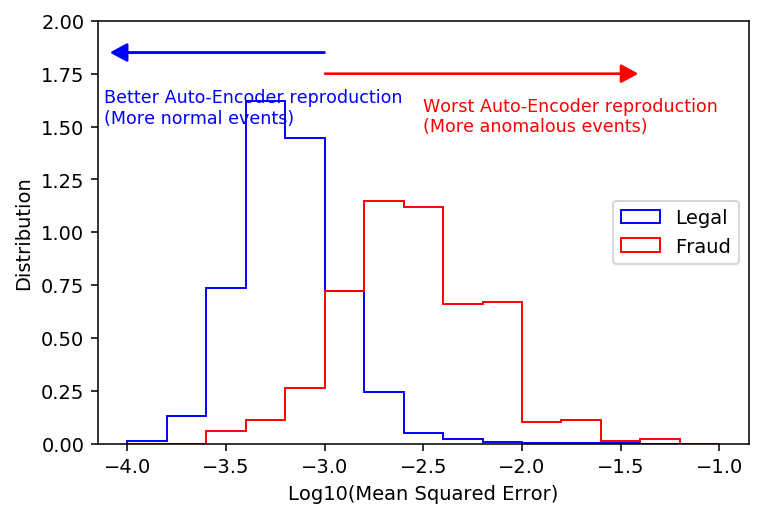

In [193]:
plt.figure(dpi=140)
plt.hist(legal,density=True,bins=15,range=(-4,-1),histtype='step',label='Legal', color='blue')
plt.hist(fraud,density=True,bins=15,range=(-4,-1),histtype='step',label='Fraud', color='red')
plt.xlabel('Log10(Mean Squared Error)')
plt.ylabel('Distribution')
plt.arrow(-3,1.75,1.5,0,head_width=0.08, head_length=0.08, color='red')
plt.arrow(-3,1.85,-1,0,head_width=0.08, head_length=0.08, color='blue')
plt.text(.5,.82,'Worst Auto-Encoder reproduction\n(More anomalous events)',ha='left',va='top', fontsize=9, color='red',transform = plt.gca().transAxes)
plt.text(.01,.84,'Better Auto-Encoder reproduction\n(More normal events)',ha='left',va='top', fontsize=9, color='blue',transform = plt.gca().transAxes)
plt.ylim(0,2)
plt.legend(loc=5)
plt.show()

## We can explore how good we can isolate fraud cases 

In [197]:
# Original fraud rate inverse
original = len(legal)/len(fraud)
threshold = -2.5
new = len(list(filter(lambda t: t>threshold, legal))) / len(list(filter(lambda t: t>threshold, fraud))) 
print('With threshold = '+str(threshold)+'\nWe pass from 1 fraud every ',round(original,1),' transaction to one fraud every ',round(new,1),' transactions')

With threshold = -2.5
We pass from 1 fraud every  577.9  transaction to one fraud every  15.0  transactions
